In [1]:
from utils.load_dataset import PlantVillageDataset
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, Subset
from utils.preprocessing import preprocessing_img
import torchvision.models  as models
from torchvision import transforms
import numpy as np
from utils.linear_model import LinearHeadModel, train_linear_model
import cv2

## Import data and loaders

In [2]:
from create_datasets import create_dataloader

PATH = './Plant_leave_diseases_dataset_with_augmentation'
transform = transforms.Compose([
    lambda x: cv2.resize(x, (224, 224)),
    transforms.ToTensor()
])
train_models_dataloaders, test_models_dataloaders, train_validation_dataloader, test_validation_dataloader, training_data = create_dataloader(PATH, transform)

## Vizualize the data

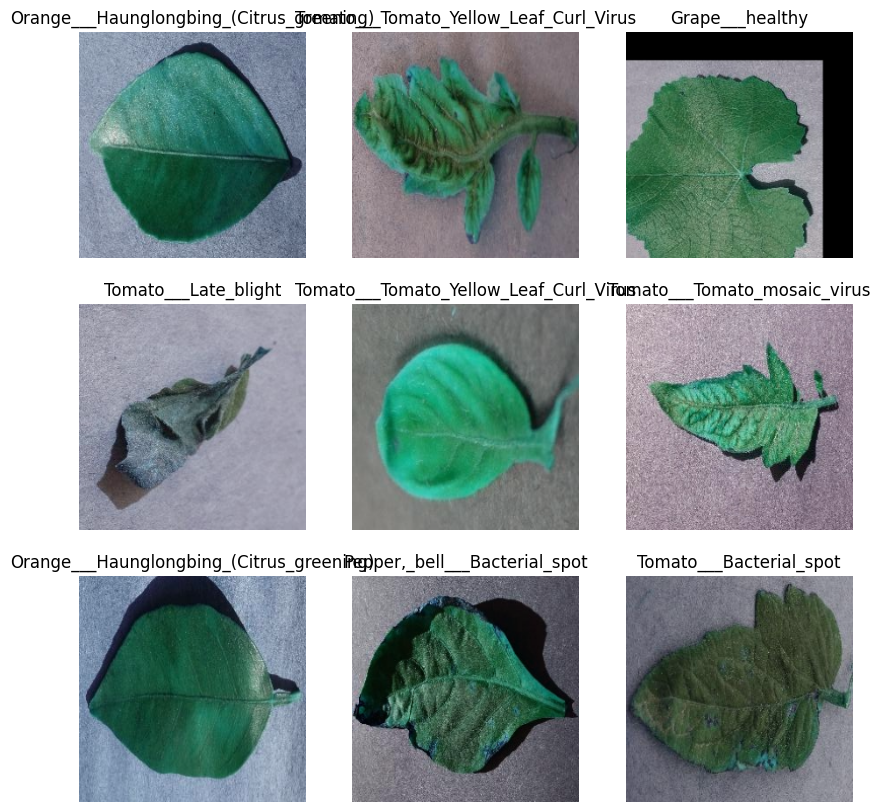

In [3]:
figure = plt.figure(figsize=(10, 10))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(list(training_data.label_to_idx.keys())[label])
    plt.axis("off")
    plt.imshow(img.swapaxes(0,2))
plt.show()

## Load Models

In [4]:
# ResNet50
resnet50 = models.resnet50(weights='ResNet50_Weights.DEFAULT')
for param in resnet50.parameters():
    param.requires_grad = False

# DenseNet201
densenet = models.densenet201(weights=models.DenseNet201_Weights.DEFAULT)
for param in densenet.parameters():
    param.requires_grad = False

# EfficientNetB0
efficientnet_b0 = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
for param in efficientnet_b0.parameters():
    param.requires_grad = False

# EfficientNetB3
efficientnet_b3 = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.IMAGENET1K_V1)
for param in efficientnet_b3.parameters():
    param.requires_grad = False

In [5]:
models_list = [resnet50, densenet, efficientnet_b0, efficientnet_b3]

## Set Device

In [6]:
# Set device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

## Linear Model

In [7]:
# Constants
num_classes = 38
steps = 100
from dim_constants import input_dim_resnet, input_dim_densenet, input_dim_b0, input_dim_b3

### ResNet50

In [8]:
import importlib
import utils
importlib.reload(utils.linear_model)
from utils.linear_model import train_linear_model

In [9]:
resnet50_classifier = train_linear_model(0, 
                                        input_dim_resnet, 
                                        num_classes, 
                                        models_list, 
                                        train_models_dataloaders, 
                                        test_models_dataloaders, 
                                        device)

Epoch 1/10, Loss: 0.0516, Test Accuracy: 0.5027
Epoch 2/10, Loss: 0.0475, Test Accuracy: 0.6797
Epoch 3/10, Loss: 0.0462, Test Accuracy: 0.7086
Epoch 4/10, Loss: 0.0458, Test Accuracy: 0.7178
Epoch 5/10, Loss: 0.0456, Test Accuracy: 0.7588
Epoch 6/10, Loss: 0.0452, Test Accuracy: 0.7895
Epoch 7/10, Loss: 0.0446, Test Accuracy: 0.8058
Epoch 8/10, Loss: 0.0447, Test Accuracy: 0.8267
Epoch 9/10, Loss: 0.0446, Test Accuracy: 0.8228
Epoch 10/10, Loss: 0.0445, Test Accuracy: 0.8300


### Densenet

In [10]:
densenet_classifier = train_linear_model(1,
                                        input_dim_densenet, 
                                        num_classes, 
                                        models_list, 
                                        train_models_dataloaders, 
                                        test_models_dataloaders, 
                                        device)

Epoch 1/10, Loss: 0.0510, Test Accuracy: 0.4991
Epoch 2/10, Loss: 0.0478, Test Accuracy: 0.6702
Epoch 3/10, Loss: 0.0460, Test Accuracy: 0.7409
Epoch 4/10, Loss: 0.0454, Test Accuracy: 0.7609
Epoch 5/10, Loss: 0.0449, Test Accuracy: 0.7909
Epoch 6/10, Loss: 0.0444, Test Accuracy: 0.8191
Epoch 7/10, Loss: 0.0444, Test Accuracy: 0.8139
Epoch 8/10, Loss: 0.0444, Test Accuracy: 0.8530
Epoch 9/10, Loss: 0.0440, Test Accuracy: 0.8319
Epoch 10/10, Loss: 0.0439, Test Accuracy: 0.8578


### EfficientNetB0

In [11]:
efficientnet_b0_classifier = train_linear_model(2, 
                                        input_dim_b0, 
                                        num_classes, 
                                        models_list, 
                                        train_models_dataloaders, 
                                        test_models_dataloaders, 
                                        device)

Epoch 1/10, Loss: 0.0517, Test Accuracy: 0.4747
Epoch 2/10, Loss: 0.0485, Test Accuracy: 0.5869
Epoch 3/10, Loss: 0.0474, Test Accuracy: 0.6466
Epoch 4/10, Loss: 0.0466, Test Accuracy: 0.7095
Epoch 5/10, Loss: 0.0457, Test Accuracy: 0.7448
Epoch 6/10, Loss: 0.0455, Test Accuracy: 0.7705
Epoch 7/10, Loss: 0.0448, Test Accuracy: 0.7933
Epoch 8/10, Loss: 0.0447, Test Accuracy: 0.8047
Epoch 9/10, Loss: 0.0446, Test Accuracy: 0.8298
Epoch 10/10, Loss: 0.0444, Test Accuracy: 0.8247


### EfficientNetB3

In [12]:
efficientnet_b3_classifier = train_linear_model(3, 
                                        input_dim_b3, 
                                        num_classes, 
                                        models_list, 
                                        train_models_dataloaders, 
                                        test_models_dataloaders, 
                                        device)

Epoch 1/10, Loss: 0.0518, Test Accuracy: 0.3730
Epoch 2/10, Loss: 0.0495, Test Accuracy: 0.5553
Epoch 3/10, Loss: 0.0479, Test Accuracy: 0.6283
Epoch 4/10, Loss: 0.0472, Test Accuracy: 0.6667
Epoch 5/10, Loss: 0.0468, Test Accuracy: 0.6841
Epoch 6/10, Loss: 0.0465, Test Accuracy: 0.6944
Epoch 7/10, Loss: 0.0461, Test Accuracy: 0.7053
Epoch 8/10, Loss: 0.0459, Test Accuracy: 0.7156
Epoch 9/10, Loss: 0.0459, Test Accuracy: 0.7234
Epoch 10/10, Loss: 0.0457, Test Accuracy: 0.7391


## Save models

In [13]:
def save_model(model, path):
    torch.save(model.state_dict(), path)
    print(f"Final model saved to {path}")

In [14]:
# Paths for saving
densenet201_path = "densenet201.pth"
efficientnet_b0_path = "efficientnet_b0.pth"
efficientnet_b3_path = "efficientnet_b3.pth"
resnet50_path = "resnet50.pth"

In [15]:
save_model(resnet50_classifier, f'models_augmented/{resnet50_path}')
save_model(densenet_classifier, f'models_augmented/{densenet201_path}')
save_model(efficientnet_b0_classifier, f'models_augmented/{efficientnet_b0_path}')
save_model(efficientnet_b3_classifier, f'models_augmented/{efficientnet_b3_path}')

Final model saved to models_augmented/resnet50.pth
Final model saved to models_augmented/densenet201.pth
Final model saved to models_augmented/efficientnet_b0.pth
Final model saved to models_augmented/efficientnet_b3.pth


# Ensemble Learning

In [16]:
from dim_constants import input_dim_resnet,  input_dim_densenet, input_dim_b0, input_dim_b3
num_classes = 38
output_dim = num_classes + 1

In [24]:
import importlib
import utils
importlib.reload(utils)
from utils.ensemble_model import train_ensemble_weights, WeightedEnsemble

In [25]:
# List of pretrained models
models_list = [resnet50, densenet, efficientnet_b0, efficientnet_b3]

# Define the ensemble
ensemble = WeightedEnsemble(models_list, output_dim)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam([ensemble.weights], lr=0.01) 

# Train the ensemble weights
train_ensemble_weights(ensemble, criterion, optimizer, train_validation_dataloader, test_validation_dataloader)

KeyboardInterrupt: 

In [ ]:
# Evaluate on test set
correct = 0
total = 0
with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_validation_dataloader):

        inputs, labels = inputs.to(device), labels.to(device)
        
        # Initialize a zero tensor for averaging
        final_outputs = torch.zeros(inputs.size(0), output_dim).to(device)
        
        for model in models_list:
            model.eval()  # Ensure the model is in evaluation mode
            outputs = model(inputs).to(device)
            _, predicted = torch.max(final_outputs, 1)
            final_outputs += outputs  # Accumulate outputs from each model
        
        # Average the accumulated outputs
        final_outputs /= len(models_list)
        
        # Compute predictions and accuracy
        _, predicted = torch.max(final_outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate test accuracy
    test_accuracy = correct / total

    print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8939
